In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats
import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset= randn(25)

(0, 1)

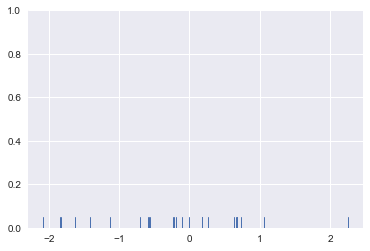

In [4]:
sns.rugplot(dataset)
plt.ylim(0,1)

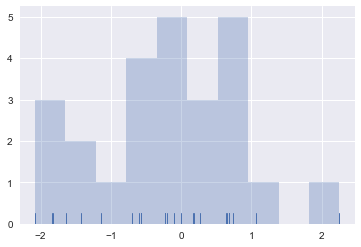

In [5]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

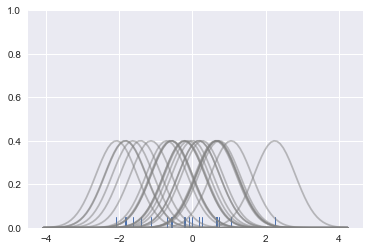

In [8]:
sns.rugplot(dataset)
x_min=dataset.min()-2
x_max=dataset.max()+2

x_axis=np.linspace(x_min,x_max,100)

bandwidth=((4*dataset.std()**5)/ ((3)*len(dataset)))**0.2

kernel_list=[]

for datapoint in dataset:
    kernel = stats.norm(datapoint,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel =kernel /kernel.max()
    kernel=kernel*0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
plt.ylim(0,1)

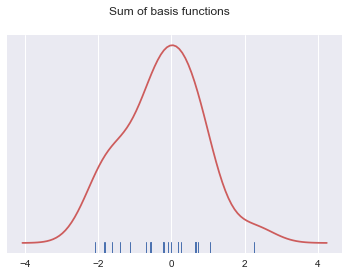

In [9]:
sum_of_kde=np.sum(kernel_list,axis=0)
fig=plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of basis functions")

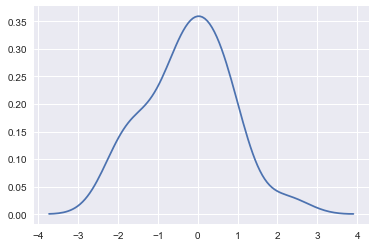

In [10]:
sns.kdeplot(dataset)

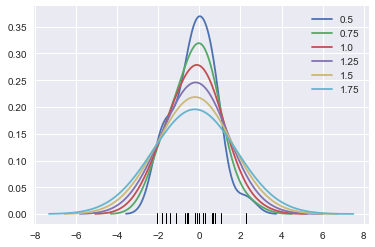

In [13]:
sns.rugplot(dataset,color="black")
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

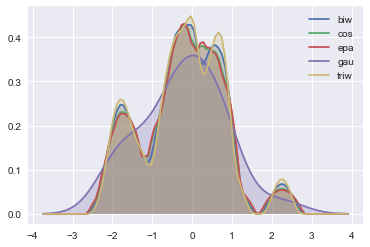

In [15]:
kernel_options= ['biw','cos','epa','gau','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

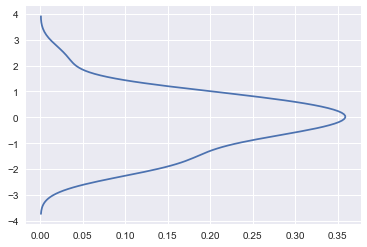

In [16]:
sns.kdeplot(dataset,vertical=True)

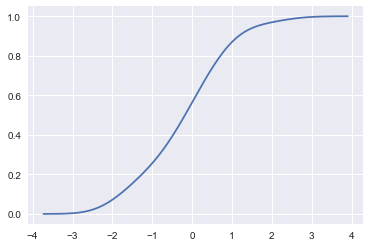

In [17]:
sns.kdeplot(dataset,cumulative=True)

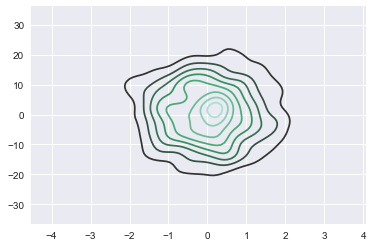

In [20]:
mean= [0,0]
cov=[[1,0],[0,100]]
dataset2=np.random.multivariate_normal(mean,cov,1000)

dframe=pd.DataFrame(dataset2, columns=['X','Y'])
sns.kdeplot(dframe)

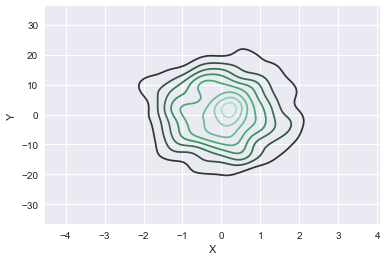

In [21]:
sns.kdeplot(dframe.X,dframe.Y)

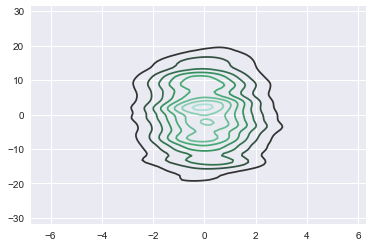

In [23]:
sns.kdeplot(dframe,bw=1)

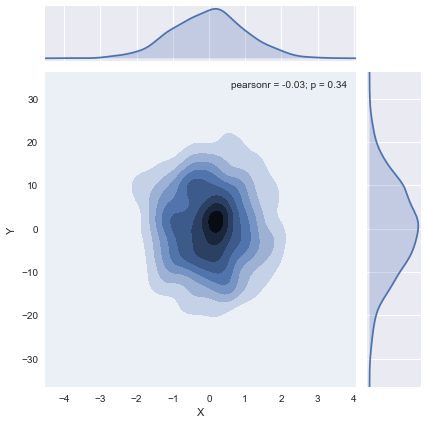

In [24]:
sns.jointplot('X','Y',dframe,kind='kde')